In [2]:
import hashlib
import json

import matplotlib.pyplot as plt
import numpy as np
import requests
from tqdm import tqdm

from collections import Counter
import os
from thefuzz import fuzz

In [3]:
with open("../templates/outputs/metadata_w_examples_merged.json") as f:
    metadatas = json.load(f)
len(metadatas)

5718

In [4]:
directory = "../templates/outputs/template_examples"

print("Size:", len(metadatas))

temp_ids = set()
for metadata in metadatas:
    temp_ids.add(metadata["Template ID"])

print("Temps:", len(temp_ids))

examples = os.listdir(directory)
print("Examples:", len(examples))
orphans = []
for file in examples:
    temp_id = file.split("_")[1].split(".")[0]
    if temp_id not in temp_ids:
        orphans.append(temp_id)
        # os.remove(f"{directory}/{file}")

print("Orphan:", len(orphans))
print(len(Counter(orphans)), Counter(orphans))

Size: 5718
Temps: 5718
Examples: 17545
Orphan: 121
13 Counter({'426694345': 36, '398766166': 16, '218473759': 14, '313745472': 13, '393943088': 12, '459747098': 8, '338168606': 7, '524131321': 4, '311662837': 3, '463122718': 3, '409505719': 2, '431793821': 2, '419692257': 1})


In [5]:
exp_cnts = []
for metadata in metadatas:
    exp_cnts.append(len(metadata["examples"]))

In [6]:
Counter(exp_cnts)

Counter({0: 2403,
         1: 1057,
         2: 498,
         14: 338,
         3: 310,
         4: 212,
         5: 155,
         6: 126,
         13: 121,
         7: 94,
         8: 66,
         12: 64,
         10: 64,
         9: 60,
         11: 43,
         15: 22,
         17: 15,
         16: 12,
         28: 8,
         19: 8,
         18: 7,
         21: 4,
         20: 4,
         24: 4,
         22: 4,
         27: 4,
         36: 3,
         23: 2,
         41: 2,
         39: 1,
         40: 1,
         29: 1,
         43: 1,
         50: 1,
         75: 1,
         25: 1,
         26: 1})

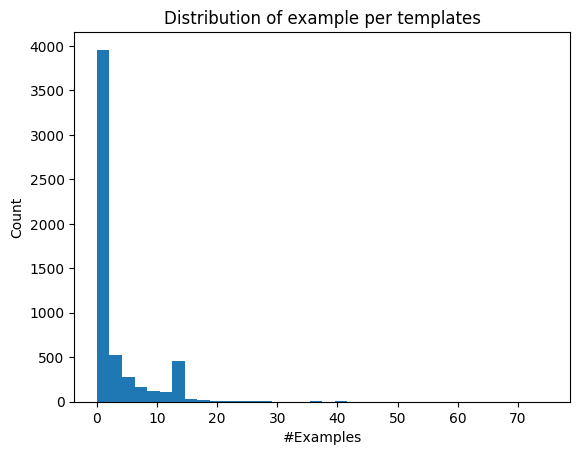

In [7]:
plt.hist(exp_cnts, bins=36)
plt.xlabel("#Examples")
plt.ylabel("Count")
plt.title("Distribution of example per templates")
plt.savefig("Distribution of examples.png")